In [ ]:
import pandas as pd
mlb=pd.read_csv('mlb.csv')
print(mlb.head())
print(mlb.shape)

              name team       position  height  weight    age
0    Adam_Donachie  BAL        Catcher      74   180.0  22.99
1        Paul_Bako  BAL        Catcher      74   215.0  34.69
2  Ramon_Hernandez  BAL        Catcher      72   210.0  30.78
3     Kevin_Millar  BAL  First_Baseman      72   210.0  35.43
4      Chris_Gomez  BAL  First_Baseman      73   188.0  35.71
(1034, 6)


In [ ]:
#summarizing statistics, so we could see our summary statistics all at once
print(mlb.describe())

            height       weight          age
count  1034.000000  1033.000000  1034.000000
mean     73.697292   201.689255    28.736712
std       2.305818    20.991491     4.320310
min      67.000000   150.000000    20.900000
25%      72.000000   187.000000    25.440000
50%      74.000000   200.000000    27.925000
75%      75.000000   215.000000    31.232500
max      83.000000   290.000000    48.520000


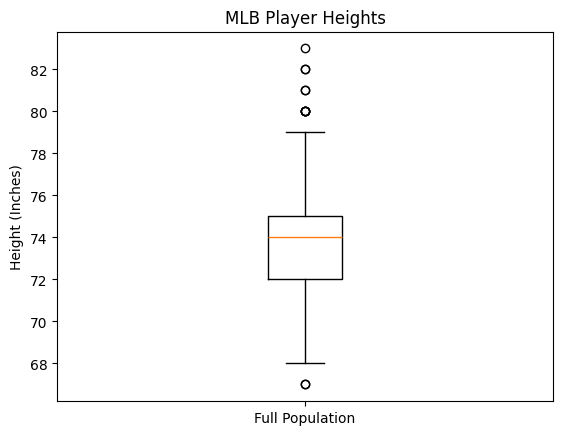

In [ ]:
#Plot the data, so we could analayze the data. Importing Matplotlib to create plots
# and boxplots of all the heights in our population

#Box plots show the range and distribution of data.
#The minimum value of height in the data is around 67
#The maximum is around 83.
#The median is around 74 inches.

import matplotlib.pyplot as plt
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height']])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1], ['Full Population'])
plt.show()

In [ ]:
#Creating random samples
#randomly selecting 30 baseball players for both of our samples, sample1 and
#sample2. We set it here because it ensures that we will get the same results
# as we do when run the same code.

sample1=mlb.sample(n=30,random_state=8675309)
sample2=mlb.sample(n=30,random_state=1729)
sample3=[71, 72, 73, 74, 74, 76, 75, 75, 75, 76, 75, 77, 76, 75, 77, 76, 75,\
76, 76, 75, 75, 81,77, 75, 77, 75, 77, 77, 75, 75]

Using the same box plot code we used before, but instead of
plotting only one dataset, we plot four datasets: the distribution of heights
of the full population and the distribution of heights of all three samples
separately.

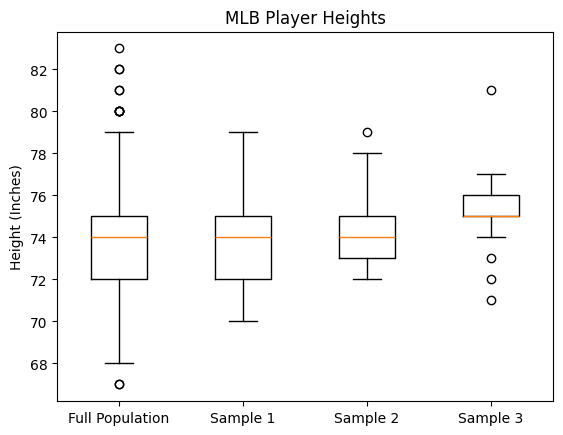

In [ ]:
import numpy as np
fig1, ax1 = plt.subplots()
ax1.boxplot([mlb['height'],sample1['height'],sample2['height'],np.array(sample3)])
ax1.set_ylabel('Height (Inches)')
plt.title('MLB Player Heights')
plt.xticks([1,2,3,4], ['Full Population','Sample 1','Sample 2','Sample 3'])
plt.show()

The mean height
for sample1 is 73.8, while the mean height for sample2 is 74.4, and the mean height for sample3 is 75.4. These means are relatively close to the mean height
of the full population, 73.7.

In [ ]:
print(np.mean(sample1['height']))
print(np.mean(sample2['height']))
print(np.mean(sample3))

73.8
74.36666666666666
75.43333333333334


Differences Between Sample Data
We saw a difference of about 0.6 inches between sample1 and sample2 and a
difference of more than 1.6 inches between sample1 and sample3.

Need to understand the size differences we
should expect between random samples from our population.

We create the alldifferences variable as an empty list.
Then we create a loop that goes through 1,000 iterations. In each itera-
tion, we create two new samples and append the difference between their
sample means to our alldifferences list. The final result is a completely
filled-in alldifferences, a list of 1,000 differences between randomly selected
samples.

In [ ]:
alldifferences=[]
for i in range(1000):
  newsample1=mlb.sample(n=30,random_state=i*2)
  newsample2=mlb.sample(n=30,random_state=i*2+1)
  alldifferences.append(newsample1['height'].mean()-newsample2['height'].mean())

print(alldifferences[0:10])

[np.float64(0.8333333333333286), np.float64(-0.30000000000001137), np.float64(-0.10000000000000853), np.float64(-0.1666666666666572), np.float64(0.06666666666667709), np.float64(-0.9666666666666686), np.float64(0.7999999999999972), np.float64(0.9333333333333371), np.float64(-0.5333333333333314), np.float64(-0.20000000000000284)]


Next, we import the seaborn package because it can make beautiful
plots. We use its distplot() method to plot the differences we find.

Creating a Histogram:

Each bar represents a relative frequency; it represents
how likely each observation is compared to other observations. There’s a
high bar at the point marked 0 on the x-axis. This indicates a relatively high
number of differences in our alldifferences list that are very close to 0. A
much lower bar appears at x = 1. This indicates relatively few cases in which
the difference between the sample means is about 1.

<ipython-input-13-7ef496507ab9>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax=sns.distplot(alldifferences).set_title("Differences Between Sample Means")


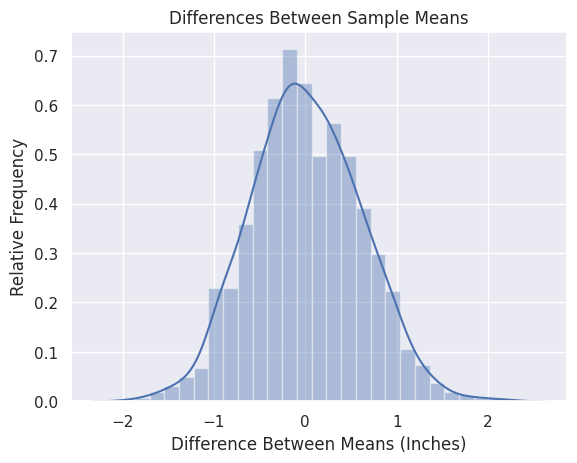

In [ ]:
import seaborn as sns
sns.set()
ax=sns.distplot(alldifferences).set_title("Differences Between Sample Means")
plt.xlabel('Difference Between Means (Inches)')
plt.ylabel('Relative Frequency')
plt.show()

Create largedifferences, a list that contains all elements of alldifferences with magnitude greater than or equal to 1.6.

In [ ]:
largedifferences=[diff for diff in alldifferences if abs(diff)>=1.6]
print(len(largedifferences))

8


Create smalldifferences, a list containing every element of
alldifferences that has magnitude greater than or equal to 0.6 inches.
We can see that differences of this magnitude occur about 31.4 percent
of the time. In this case, we would say that our p-value is 0.314. If sample1
and sample2 come from the same population, we would have to believe that
this size of difference, which occurs about 31 percent of the time, occurred
in our case.

In [ ]:
smalldifferences=[diff for diff in alldifferences if abs(diff)>=0.6]
print(len(smalldifferences))

314


Performing Hypothesis Testing:

Hypothesis 0: sample1 and sample3 are random samples from the same population.

Hypothesis 1: sample1 and sample3 are not random samples from the same population.

1. Assume that Hypothesis 0, the null hypothesis, is true.
2. Find how likely we are to observe sample means that differ by as much as our observed sample means, assuming that Hypothesis 0 is true. The
likelihood of this occurring is called the p-value.
3. If the p-value is small enough, we reject Hypothesis 0, and we’re there-
fore willing to accept Hypothesis 1.

The most common significance level used in empirical research is 5 percent, meaning that we consider the rejection of the null hypothesis justified if p < 0.05.

----

The t-Test: does the process of hypothe-
sis testing quickly and painlessly, without requiring a for loop or a histogram.



In [ ]:
#The SciPy package that this module is a part of is a popular Python library that includes,
# among other things, many statistical tests that could be useful as we get more
# advanced in statistics and data science.

import scipy.stats
scipy.stats.ttest_ind(sample1['height'],sample2['height'])

TtestResult(statistic=np.float64(-1.0839563860213952), pvalue=np.float64(0.2828695892305152), df=np.float64(58.0))

The p-value is relatively high (about 0.283), certainly higher than a 0.05 significance threshold. (It differs a little from the 0.314 p-value we calculated earlier because that p-value calculation method was an approximate method, and this one is more mathematically exact.) This high p-value indicates that it is plausible that these are samples from the same population.

---

Another type of t-test, the Welch’s t-test, is designed for comparing samples when we don’t want to assume that the samples have equal variance.
You can implement Welch’s t-test in Python by adding equal_var=False to the t-test command.

---

his test requires only one line, since the SciPy package includes an
implementation of the Mann-Whitney U test. Just like the t-test, all we need
to input is the data we’re comparing, and the code will output a p-value.

---

In [ ]:
scipy.stats.mannwhitneyu(sample1['height'],sample2['height'])

MannwhitneyuResult(statistic=np.float64(392.0), pvalue=np.float64(0.38913738408151577))

---

Nuances of Hypothesis Testing:

1. What a p-value tells you: it tells
you the likelihood of observing data, after assuming a null hypothesis to be true. People often think or wish it told them the converse: the likelihood of a hypothesis’s truth, given some observed data. Always remember that a p-value should not be interpreted directly as a probability of a hypothesis being true.

2. The difference between accepting a
hypothesis and failing to reject it. Hypothesis testing has only two possible
outcomes: either we reject a null hypothesis, or we decide not to reject
the null hypothesis. Failing to reject something is not quite the same as
wholeheartedly accepting it, and just because a p-value is not below a significance threshold does not mean that two groups are certainly the same.
Just because one t-test fails to lead to a rejection of the null hypothesis does not mean that the null hypothesis is certainly true

3. Statistics has an analogous principle: all acceptances of the null hypothesis are alike, but each
rejection of the null hypothesis happens for a different reason. The null
hypothesis states that two samples are random draws from the same population. If we reject the null hypothesis, any one or more of a number of
things could be true: our two samples could be random draws from different populations, or both could be samples from the same population but
not randomly selected, or a source of sampling bias could be present, or
blind luck might be occurring.

4. Remember is the difference between statistical significance
and practical significance.

---

---
Comparing Groups in a Practical Context:

In [ ]:
desktop=pd.read_csv('desktop.csv')
laptop=pd.read_csv('laptop.csv')

print(desktop.head())
print(laptop.head())

   userid  spending  age  visits
0       1      1250   31     126
1       2       900   27       5
2       3         0   30     459
3       4      2890   22      18
4       5      1460   38      20
   userid  spending  age  visits
0      31      1499   32      12
1      32       799   23      40
2      33      1200   45      22
3      34         0   59     126
4      35      1350   17      85


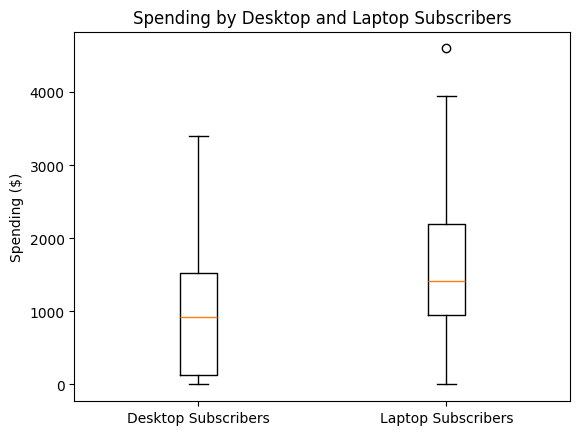

In [ ]:
#plot of the amounts that subscribers to each list have spent on our company’s products

import matplotlib.pyplot as plt
sns.reset_orig()
fig1, ax1 = plt.subplots()
ax1.set_title('Spending by Desktop and Laptop Subscribers')
ax1.boxplot([desktop['spending'].values,laptop['spending'].values])
ax1.set_ylabel('Spending ($)')
plt.xticks([1,2], ['Desktop Subscribers','Laptop Subscribers'])
plt.show()

Import Matplotlib to create plots. We use its boxplot() command
with data from desktop’s spending column and laptop’s spending column.

Both groups have minima at 0. Laptop subscribers have a higher 25th percentile, 50th percentile, and 75th percentile, as well as a high outlier that is higher
than any observations in the desktop subscriber group. On the other
hand, the distributions don’t seem terribly different either; desktop subscribers don’t seem totally different from laptop subscribers.

We have
groups that are different, but not too different.



---
Besides plotting, we can do simple calculations that get summary statis-
tics for our data. In the following snippet, we’ll get some of these descriptive
statistics.

We check the mean age of desktop subscribers and
laptop subscribers. The results reveal that the mean desktop subscriber is
about 35.8 years old, and the mean laptop subscriber is about 38.7 years old.
We can conclude that these groups are different, in the sense that they’re
not identical.

    Hypothesis 0: The two email lists are random samples from the same population.
    Hypothesis 1: The two email lists are not random samples from the same population.

In [ ]:
print(np.mean(desktop['age']))
print(np.mean(laptop['age']))
print(np.median(desktop['age']))
print(np.median(laptop['age']))
print(np.quantile(laptop['spending'],.25))
print(np.quantile(desktop['spending'],.75))
print(np.std(desktop['age']))

35.766666666666666
38.733333333333334
32.0
33.0
957.5
1528.25
14.943634839697543


We can see that our
p-value is about 0.04. Since we use the common 5 percent significance level,
this p-value is low enough for us to conclude that the desktop and laptop
groups are not random draws from the same population, so we can reject
the null hypothesis. It appears that desktop and laptop email subscribers
are at least slightly different in a detectable way.

In [ ]:
scipy.stats.ttest_ind(desktop['spending'],laptop['spending'])

TtestResult(statistic=np.float64(-2.109853741030508), pvalue=np.float64(0.03919630411621095), df=np.float64(58.0))

---
Summary:
---
In chapter 3, we talked about populations and samples, and how
samples that come from the same population can/should resemble each other.

Introduced hypothesis testing, like the t-test, a useful tool
for detecting whether two groups are likely to be random draws from the
same population.

Also textbook discussed some business scenarios where the t-test
would be useful, including a marketing scenario and a decision about
whether to send different emails to different email lists.

Learned how to evaluate p-value and draw a conclusion based on it.

Used two different data sets to compare them and find the difference between them by drawing boxplots.

Learned how to  do simple calculations that get summary statistics for the data.